In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

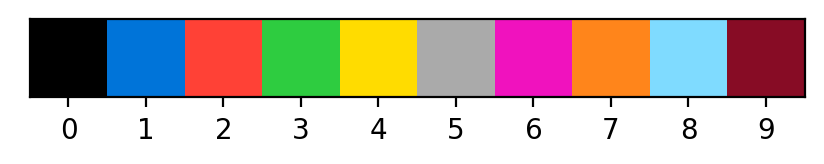

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [9]:
def maxcolor(A):
    b = np.bincount(A.flatten(),minlength=10)
    b[0] = 500 #???255
    c=np.argsort(b)[-2]
    return c
#no count black

def mincolor(A):
    try:
        b = np.bincount(A.flatten(),minlength=10)
        b1=np.delete(b,0)
        #b1=b
        c = int(np.where(b==np.min(b1[np.nonzero(b1)]))[0])
        return c
    except:
        return 0

In [10]:
color_select=[maxcolor,mincolor,0,1,2,3,4,5,6,7,8,9]

In [11]:
def colorbycolor_select(A,S):
    A=np.array(Defensive_Copy(A))
    if S in color_select:
        if type(S) != int:
            x=S(A)
        else:
            x=S
        return x

In [12]:
def cropbycolor(a0,c):
    a=np.array(a0)
    if c not in a:
        return -1

    coords = np.argwhere(a==c)
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    if x_min!=x_max or y_min!=y_max:
        return a[y_min:y_max+1, x_min:x_max+1],[y_min,y_max,x_min,x_max]
    else: 
        return -1


In [13]:
# #array
# def getObjectHash(pixmap):
#     flat = pixmap.flatten().astype(np.bool)
#     mult = np.array([2 ** x for x in range(len(flat))])
#     return np.sum(flat * mult)
# #經測試沒有overflow問題
# def groupByColor(pixmap):
#     nb_colors = int(pixmap.max()) + 1
#     splited = [(pixmap == i) * i for i in range(1, nb_colors)]
#     return [x for x in splited if np.any(x)]
# def checkColorMap(a,b):
# #     a_copy=a.copy()
# #     b_copy=b.copy()
# #     a_copy[a_copy==0]=10
# #     b_copy[b_copy==0]=10
#     a[a==0]=10
#     b[b==0]=10
#     c = 1
#     inp_hashes = sorted([getObjectHash(pm) for pm in groupByColor(a)])
#     out_hashes = sorted([getObjectHash(pm) for pm in groupByColor(b)])
#     c *= inp_hashes == out_hashes
#     return bool(c)
# # def checkColorMap(a0,b0):
# #     a=np.array(a0)
# #     b=np.array(b0)
# #     a[a==0]=10
# #     b[b==0]=10
# #     c = 1
# #     inp_hashes = sorted([getObjectHash(pm) for pm in groupByColor(a)])
# #     out_hashes = sorted([getObjectHash(pm) for pm in groupByColor(b)])
# #     c *= inp_hashes == out_hashes

In [14]:
# def findColorMap(a,b):
#     colormap = {}
#     a1=np.array(a).flatten()
#     b1=np.array(b).flatten()

#     for col, idx in zip(*np.unique(a1,return_index=True)):
#         if col in colormap.keys(): continue
#         colormap[col] = b1[idx]
#     return colormap
# def applyColorMap(pixmap, colormap):
#     pixmap=np.array(pixmap)
# #     pixmap[pixmap==0]=10

#     #print(pixmap,colormap)
#     a1=pixmap
#     a1[a1==0]=10
# #     print(a1)
# #     print(colormap)
#     for i in range(len(a1)):
#         for j in range(len(a1[0])):
#             if a1[i][j] not in colormap.keys():
#                 return -1
#             a1[i][j]=colormap[pixmap[i][j]]
#     a1[a1==10]=0
            
#     return a1.tolist()

# # def applyColorMap(pixmap, colormap):
# #     a1=np.array(pixmap)
# #     for i in range(a1.shape[0]):
# #         for j in range(a1.shape[1]):
# #             if a1[i][j] not in colormap: #
# #                 continue #
# #             a1[i][j]=colormap[pixmap[i][j]]
# #     return a1.tolist()

In [15]:
# def mergedict(dict1):
#     dict3={}
#     for dict2 in dict1:
#         for key in dict2.keys():
#             if key not in dict3.keys():
#                 dict3[key]=dict2[key]
#             elif dict3[key]!= dict2[key]:
#                 return False
#     return dict3

In [16]:
def getObjectHash(pixmap):
    flat = pixmap.flatten().astype(np.bool)
    mult = np.array([2 ** x for x in range(len(flat))])
    return np.sum(flat * mult)
#經測試沒有overflow問題
def groupByColor(pixmap):
    nb_colors = int(pixmap.max()) + 1
    splited = [(pixmap == i) * i for i in range(1, nb_colors)]
    return [x for x in splited if np.any(x)]
def checkColorMap(a0,b0):
    a=np.array(a0)
    b=np.array(b0)
    a[a==0]=10
    b[b==0]=10
    c = 1
    inp_hashes = sorted([getObjectHash(pm) for pm in groupByColor(a)])
    out_hashes = sorted([getObjectHash(pm) for pm in groupByColor(b)])
    c *= inp_hashes == out_hashes
    return bool(c)
def findColorMap(a,b):
    colormap = {}
    a1=np.array(a).flatten()
    b1=np.array(b).flatten()

    for col, idx in zip(*np.unique(a1,return_index=True)):
        if col in colormap.keys(): continue
        colormap[col] = b1[idx]
    return colormap

def mergedict(dict1):
    dict3={}
    for dict2 in dict1:
        for key in dict2.keys():
            if key not in dict3.keys():
                dict3[key]=dict2[key]
            elif dict3[key]!= dict2[key]:
                return False
    return dict3
def applyColorMap(pixmap, colormap):
    a1=np.array(pixmap)
    for i in range(a1.shape[0]):
        for j in range(a1.shape[1]):
            if a1[i][j] not in colormap: #
                continue #
            a1[i][j]=colormap[pixmap[i][j]]
    return a1.tolist()

In [17]:
D0=[[0,1,2,0],[0,0,3,0],[2,1,0,0],[0,0,0,0]]
D=np.array(D0)

In [18]:
D[1:3,1:3]=np.array([[2,2],[2,2]])
D

array([[0, 1, 2, 0],
       [0, 2, 2, 0],
       [2, 2, 2, 0],
       [0, 0, 0, 0]])

In [19]:
def Solve_color_crop(basic_task): 
    #returns -1 if no match is found
    #returns  Transformed_Test_Case  if the mathching rule is found
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    for i in range(len(color_select)):
        
        
        solved = True
        colormaps=[]
     
        for x, y0 in zip(Input,Output):
            if len(x)!=len(y0) or len(x[0])!=len(y0[0]):
                return -1
            y=np.array(y0)
            c = colorbycolor_select(np.array(x),color_select[i])
            
            if cropbycolor(x,c)==-1:
                solved=False
                break    
            #print(i,c)
            x_crop,locate=cropbycolor(x,c)
            #print(x_crop,locate)
            y_crop=y[locate[0]:locate[1]+1,locate[2]:locate[3]+1]
            #print(x_crop,y_crop)
            #print(checkColorMap(x_crop,y_crop))
            if checkColorMap(x_crop,y_crop):
                colormaps.append(findColorMap(x_crop,y_crop))
                
            else:
                solved=False
                break 
            #print(findColorMap(x_crop,y_crop))
            #print(x_crop)
            #print(applyColorMap(x_crop,findColorMap(x_crop,y_crop)))
            if applyColorMap(x_crop,findColorMap(x_crop,y_crop))==-1:
                solved=False
                break 
            x_crop_color=applyColorMap(x_crop,findColorMap(x_crop,y_crop))
            
            x_array=np.array(x)
            x_array[locate[0]:locate[1]+1,locate[2]:locate[3]+1]=x_crop_color
            

        
        
            if not (x_array==y).all() :
                
                return -1
            
                
        totalcolormap=mergedict(colormaps)
        #print(totalcolormap)
        if totalcolormap and solved==True:
            c = colorbycolor_select(np.array(Test_Case),color_select[i])
            if cropbycolor(Test_Case,c)==-1:
                continue
            Test_Case_crop,locate=cropbycolor(Test_Case,c)
            
            if applyColorMap(Test_Case_crop,totalcolormap)==-1:
                continue
            Test_Case_color=applyColorMap(Test_Case_crop,totalcolormap)
            #print(Test_Case_color)
            Test_Case_color0=np.array(Test_Case_color)
            #print(locate)
            #print(Test_Case_color0)
            Test_Case_array=np.array(Test_Case)
            Test_Case_array[locate[0]:locate[1]+1,locate[2]:locate[3]+1]=Test_Case_color0
            return Test_Case_array.tolist()
    return -1

69 0


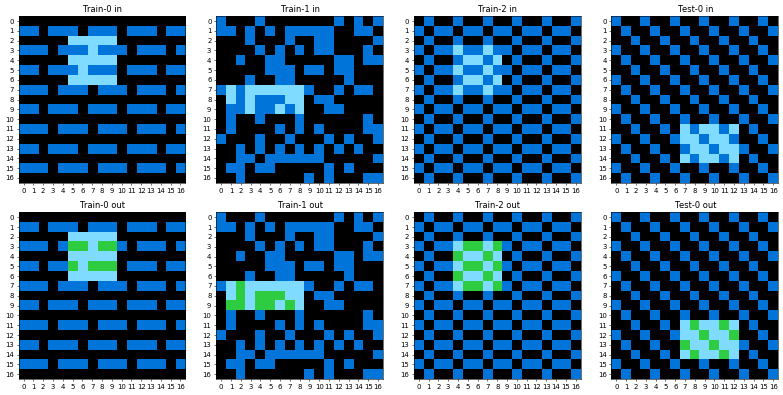

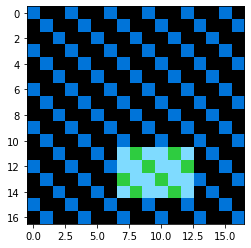

165 0


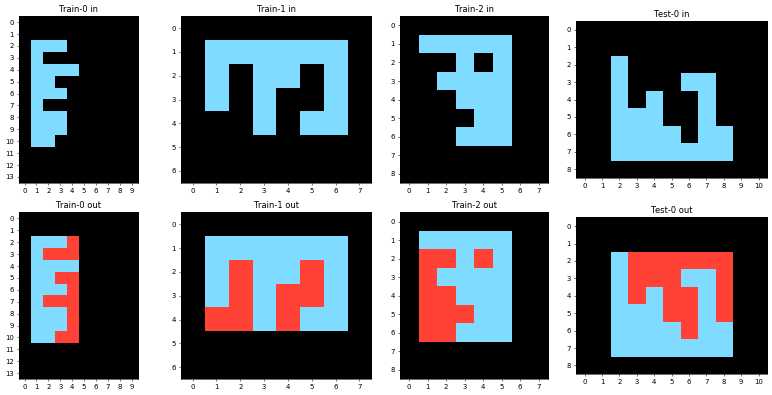

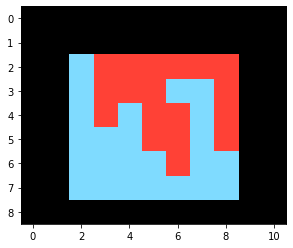

275 0


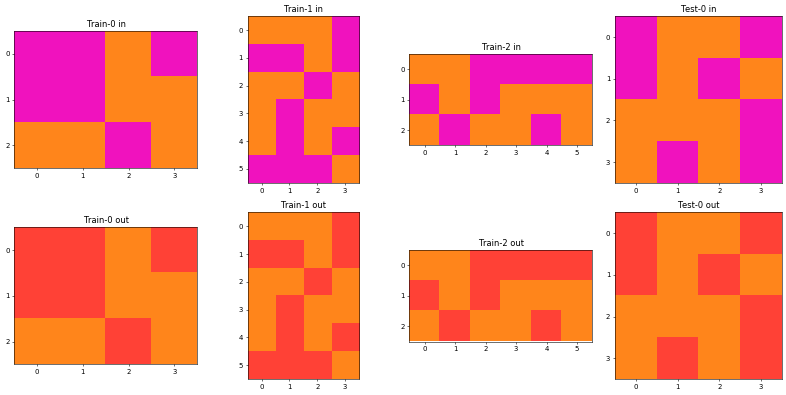

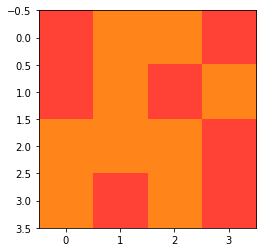

308 0


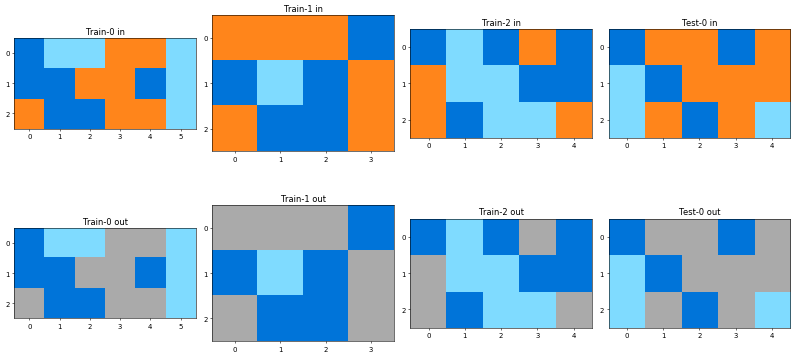

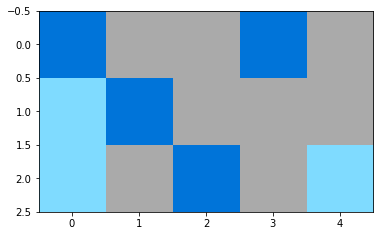

In [20]:
for i in range(400):

    task = Trains[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = Solve_color_crop(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_id.add(i)
            plot_task(task)
            
            plot_picture(proposed_solution)
        

193 0


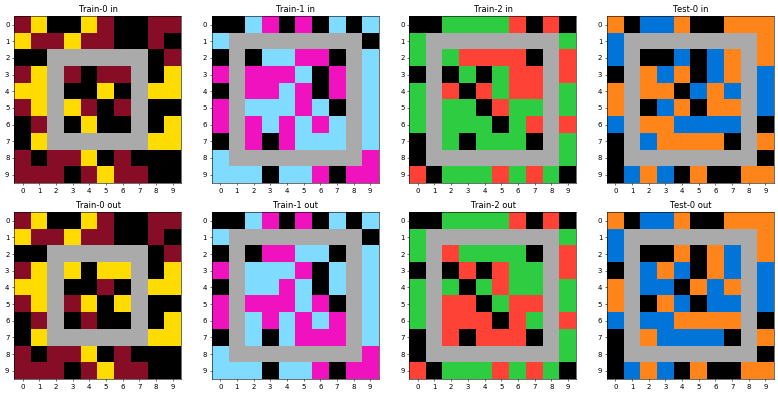

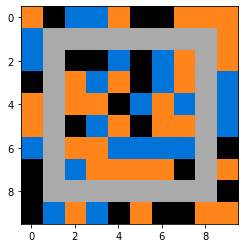

In [21]:
#have bug
for i in range(400):

    task = Evals[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = Solve_color_crop(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_eva_id.add(i)
            plot_task(task)
            
            plot_picture(proposed_solution)

In [22]:
list(solved_id)

[275, 308, 69, 165]